<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**
### **Diana Plunkett**

# **Weeks 10 & 11 - matplotlib & seaborn**
- *In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.* 

- *The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.*  


# Introduction

The data set chosen is the same as for assignmnet 7,  the **"Ask a Manager Salary Survey 2021"** which can be found here: https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?resourcekey#gid=1625408792

A bit more about the survey is here: https://www.askamanager.org/2021/05/look-at-24000-peoples-real-life-salaries.html

It has some basic demographic info (age/race/gender/education/country/ city) along with industry, salary, job title and duration. 

I will repeat some of the data wrangling done in the prior assignment, add more as needed to structure the data for data exploration and visualization.     

______________
# Data Exploration
*Import your dataset into your .ipynb, create dataframes, and explore your data.*  

*Include:* 

- *Summary statistics means, medians, quartiles* 
- *Missing value information*
- *Any other relevant information about the dataset.*  

In [77]:
#libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [78]:
#bring in data and take a quick peak at the first few rows
df=pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/602/main/Ask%20A%20Manager%20Salary%20Survey%202021%20(Responses)%20-%20Form%20Responses%201.csv')
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Change Column Names

This is **Data Wrangling** , but I am going to do it here, as the column headings are so long, that it will make all the initial "taking a look" steps challanging to read.  Simplifiying the column names first makes everything else easier.  


In [79]:
df.columns = ['timestamp','age','industry','job_title', 'title_context',
              'annual_sal','add_comp','ccy','other_ccy','income_context',
              'ctry','us_state','city','yrs_wrk_exp','yrs_in_field_exp',
              'edu','gender', 'race']
#check
df.head()

,timestamp,age,industry,job_title,title_context,annual_sal,add_comp,ccy,other_ccy,income_context,ctry,us_state,city,yrs_wrk_exp,yrs_in_field_exp,edu,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Summary Statistics

Before looking at the summary stats, let's correct the data type of thannual_sal, changing from a (string) object - specifically numbers with commas - to a numeric field.  

Next use .describe() and see the summary stats for both annual_sal and add_comp, a field that came in as numeric.

In the results, there is quite a wide range in both salary and additional compensation, with the max significantly higher than the 75%, indicating there are likely outliers.

Also while 27,880 rows have an annual salary, only 20,651 (74%) rows have additional compensation.  

In [80]:
#first change annual_sal to numeric
df['annual_sal'] = df['annual_sal'].str.replace(',','', regex=True).astype('int32')
#then look at the summary stats (with some formating to make it easier to read)
df.describe().apply(lambda s: s.apply('{0:,.2f}'.format))

,annual_sal,add_comp
count,"27,880.00","20,651.00"
mean,"143,161.14","18,231.01"
std,"5,377,572.56","836,371.49"
min,0.00,0.00
25%,"54,000.00",0.00
50%,"75,215.50","2,000.00"
75%,"110,000.00","10,000.00"
max,"870,000,000.00","120,000,000.00"


### Missing value information

Using .isnull() with .sum() shows that
- 71 rows are missing industry
- 20,667 rows are missing additional context to the title (title_context) This is actually a plus, as figuring out how to use this information could be a challange, so it is noice that only 7,213 rows, or about 25% have this.
- Similarly, large number of missing values for other currency (other_ccy) and additional context for income (income_context)
- Since us_state is only if the country is US, we can see that about 5K (4,960) row are from outside the US.  
- small number of rows missing in city, education level (edu), gender, and race.  

This shows only the true missing values.  There are some other issues with bad values addressed below.  

In [81]:
df.isnull().sum()

timestamp               0
age                     0
industry               71
job_title               0
title_context       20667
annual_sal              0
add_comp             7229
ccy                     0
other_ccy           27687
income_context      24850
ctry                    0
us_state             4960
city                   75
yrs_wrk_exp             0
yrs_in_field_exp        0
edu                   211
gender                165
race                  165
dtype: int64

# Data Wrangling

Data wrangling started above, with renaming the columns, and changing annual_sal to a numeric field. Continuing here with some of the steps taken in the previous assignment and adding others as needed to make the visualizations.  

### Correcting Data Types

First, correct some of the date types:
- Make the timestamp a datetime field.  
- Make age, yrs_wrk_exp, yrs_in_field_exp, edu and gender columns into category fields (categories are great!)
- Note that the 'ordering' of the age categories is also addressed here, which then makes the order work for the seaborn plot later.    

In [82]:
df['timestamp']=pd.to_datetime(df['timestamp'])
ages=['under 18','18-24','25-34','35-44','45-54','55-64','65 or over']
age_type=CategoricalDtype(categories=ages, ordered=True)
df['age'] = df['age'].astype(age_type)
df['yrs_wrk_exp'] = df['yrs_wrk_exp'].astype('category')
df['yrs_in_field_exp'] = df['yrs_in_field_exp'].astype('category')
df['edu'] = df['edu'].astype('category')
df['gender'] = df['gender'].astype('category')

### Cleaning Currency Data

As we did in the prior assignment, we create a new column all_ccy by merging the values in ccy and other_ccy, then cleaning up the 'creative' values entered by survey respondents. If what is in other_ccy is at all ambiguous, we make it "UNKNOWN".   

In [83]:
df['all_ccy'] = df['ccy'].astype(str)+(df['other_ccy'].fillna('--'))
df['all_ccy'] = df['all_ccy'].str.replace('Other','')
df['all_ccy'] = df['all_ccy'].str.replace('--','')
df['all_ccy'] = df['all_ccy'].str.replace('Peso Argentino','ARS')
df['all_ccy'] = df['all_ccy'].str.replace('BR$','BRL')
df['all_ccy'] = df['all_ccy'].str.replace('BRL (R$)','BRL')
df['all_ccy'] = df['all_ccy'].str.replace('CADcanadian','CAD')
df['all_ccy'] = df['all_ccy'].str.replace('CADCanadian','CAD')
df['all_ccy'] = df['all_ccy'].str.replace('Indian rupees','INR')
df['all_ccy'] = df['all_ccy'].str.replace('Mexican pesos','MXN')
df['all_ccy'] = df['all_ccy'].str.replace('American Dollars','USD')
df['all_ccy'] = df['all_ccy'].str.replace('US Dollar','USD')
df['all_ccy'] = df['all_ccy'].str.replace('PLN (Polish zloty)','PLN')
df['all_ccy'] = df['all_ccy'].str.replace('czech crowns','CZN')
df['all_ccy'] = df['all_ccy'].str.replace('NIS (new Israeli shekel)','ILS')
df['all_ccy'] = df['all_ccy'].str.replace('Norwegian kroner (NOK)','NOK')
df['all_ccy'] = df['all_ccy'].str.replace('RMB (chinese yuan)','CNY')
df['all_ccy'] = df['all_ccy'].str.replace('Taiwanese dollars','TWD')
df['all_ccy'] = df['all_ccy'].str.replace('Philippine Peso','PHP')
df['all_ccy'] = df['all_ccy'].str.replace('KRW (Korean Won)','KRW')
df['all_ccy'] = df['all_ccy'].str.replace('Singapore Dollara','SGD')
df['all_ccy'] = df['all_ccy'].str.replace('EURO','EUR')
df['all_ccy'] = df['all_ccy'].str.replace('Rupees','Unknown') #many countries use Rupees - cannot tell which
df['all_ccy'] = df['all_ccy'].str.replace('AUD/NZD','Unknown') #since we do not know if AUD or NZD
df['all_ccy'] = df['all_ccy'].str.replace('UnknownAUD','Unknown')
df['all_ccy'] = df['all_ccy'].str.replace('Unknown-','Unknown')
df['all_ccy'] = df['all_ccy'].str.replace('UnknownNZD','Unknown')
df['all_ccy'] = df['all_ccy'].str.replace('EURNOK','Unknown')
df['all_ccy'] = df['all_ccy'].str.replace('GBPNOK','Unknown')
df['all_ccy'] = df['all_ccy'].str.replace('CHFRS','Unknown')
df['all_ccy'] = ['USD' if 'USD' in s else s for s in df['all_ccy']] #if it starts USD, call it USD
df['all_ccy'] = ['Unknown' if ' ' in s else s for s in df['all_ccy']] # if it has a space, assume unknown
df['all_ccy'] = df['all_ccy'].str.upper()


As we can see in the results, the top ccy is USD, followed by CAD and GBP.  There are 533 unknowns.

In [84]:
df.groupby('all_ccy').size().sort_values(ascending=False).head()

all_ccy
USD        23250
CAD         1660
GBP         1579
EUR          633
UNKNOWN      533
dtype: int64

### Creating a Total Compensation Column

Adding  annual_sal + add_comp to get total_comp.

In [85]:
df['total_comp']=df['annual_sal']+df['add_comp']

### Tidying Gender 

Gender starts with the following values:
- Woman
- Man
- Non-binary
- Other or prefer not to answer
- Prefer not to answer
- Nan

We will combine these last 3, so we are left with the more managable
- Woman
- Man
- Non-binary
- Other or prefer not to answer

In [86]:
df['gender'] = df['gender'].str.replace('Prefer not to answer','Other or prefer not to answer')
df['gender'] = df['gender'].where(pd.notnull(df['gender']),'Other or prefer not to answer')

# Visualizations

*The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.*

### **Part 1:**
*Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:*

*Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.* 

- *Use and change a legend position*
- *Change a legend font size*
- *Place a legend outside of the plot*
- *Create a single legend for all subplots*
- *Change the title and x/y labels*
- *Change the marker, line colors, and line width*
- *Add annotations*
- *Modify Axis Text Ticks/Labels*
- *Change size of axis Labels*
- *Your own choice not included above*

### **Matplotlib 1: Stacked Bar Chart**

When looking at surveys, it is valuable to start by looking at some of the demographic data to learn more about who answered the survey.  

Let's look at age and gender.  

Properties used are:
1. Colors of the bars
2. Title
3. Fontsize of the legend
4. Fomated the y-axis to have , as a seperator for thousands
5. Changed the font size of the ticks on x and y axis


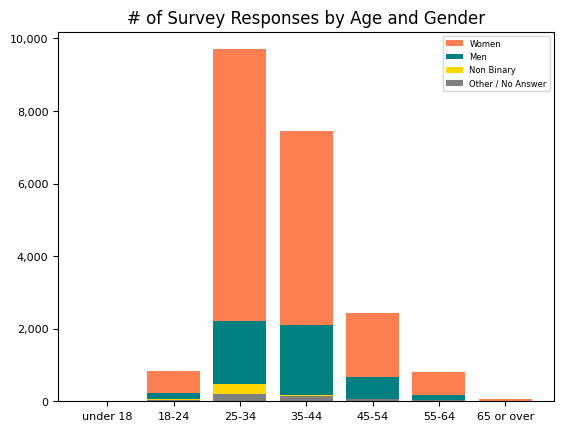

In [87]:
#create a list of the age categories, in the order we want them 
#Ended up creating this above, when making the age field a categorical
#so we can reuse that.  Leaving the origial commented out as a reminder
#ages = ['under 18','18-24','25-34','35-44','45-54','55-64','65 or over']

#create filters for each gender
filter_w= df['gender']=='Woman'
filter_m= df['gender']=='Man'
filter_nb=df['gender']=='Non-binary'
filter_na=df['gender']=='Other or prefer not to answer'
#use the filters for each gender to create list of the count of responses by age
counts_w=df[filter_w].groupby('age').size()
counts_m=df[filter_m].groupby('age').size()
counts_nb=df[filter_nb].groupby('age').size()
counts_na=df[filter_na].groupby('age').size()

#plot each gender count by age
plt.bar(ages,counts_w, label='Women', color ='Coral')
plt.bar(ages,counts_m, label='Men', color = 'Teal')
plt.bar(ages,counts_nb, label='Non Binary', color = 'Gold')
plt.bar(ages,counts_na, label='Other / No Answer', color = 'Grey')
plt.title ('# of Survey Responses by Age and Gender') #change the title
plt.legend(fontsize=6) #add legend and change the legend font size
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
#fontsize for ticks on x & y axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


### Interpreting the Stacked Bar Chart

The chart above shows that more women than any other gender answered the survey in all age categories. 

It also shows that the greatest number of responses came from those 25-34, followed by those 35-44.  

Perhaps this shows who is interested in understanding how their salary compares to their peers:  women, often underpaid, and those in the early decades of their careers.

Younger people are also more likely to choose a gender other than woman or man.

### **Matplotlib 2: Histogram Chart**

Now, let's look at a histogram of total compansation in the top 2 ccys: USD and CAD. We will limit this to total_comp < 400,000, to focus on the bulk of the responses.

We know way more respondents selected USD (23,250) than CAD 
(1,660), so we use the desity=True parameter in plt.hist to normalize the bin heights.

We also multiply the CAD by the exchange rate as of the survey date: 1.2816, so our comparison is more appropriate.  

The alpha parameter lets us see how where USD and CAD overlap - the purple area is the overlap.

Properties used are:
1. Colors for each ccy
2. Title
3. Fontsize of the legend
4. Fontsize of the x and y axis
5. Formatted the x axis to have a , as a seperator for thousands. 

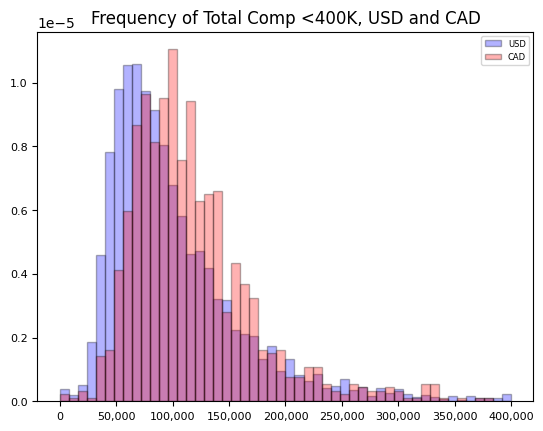

In [88]:
#filter 2 dataframes: one for USD, one for CAD
df_USD=df[df['all_ccy']=='USD']
df_CAD=df[df['all_ccy']=='CAD']
#Adjust for the exchange rate
df_CAD['total_comp'] = df_CAD['total_comp'] *1.2816
#Plot USD
plt.hist(df_USD['total_comp'],  bins = 50,range=(0, 400000), 
         label='USD', color='Blue', alpha=0.3, density=True,
         edgecolor='Black')
#plot CAD
plt.hist(df_CAD['total_comp'], bins = 50, range=(0, 400000), 
         label='CAD', color = 'Red', alpha=0.3, density=True,
         edgecolor='Black')
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title ('Frequency of Total Comp <400K, USD and CAD')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=6) # add legend and make fontsize =6
plt.show()

### Interpreting the Histogram

The shape of the histogram is roughly the same for USD and CAD: rapidly climbing to beween 50 and 100K, with a longer tail on the right.  The USD (blue) peaks earlier than the CAD (red).  There are more respondents (proportionally, since we normalized by setting density=True) who get paid in CAD at just over 50K and thru about 125K (where the red pops over the purple). On the tail, there are a mix of those paid in USD and those paid in CAD at higher salaries (where the blue or red shows above the purple).  Recall the purple is where the the frequencies of the 2 currencies overlap.  

There is actually and much much longer tail on the right, and depending on what the questions being addressed, that might be interesting to explore.  Here, I chose to focus on the bulk of the data, topping the range at 400K, so we could see more detail within this range.   

### **Part 2:**

*Recreate the visualizations above using the Seaborn library as best as possible.*  

### **Seaborn 1: Stacked Bar Chart**

Looking again at the demographic data to learn more about who answered the survey.  

As before, we will look at age and gender. 

Properties used are:
1. Colors of the bars
2. Title        
3. Fontsize and placement of the legend
4. Fomated the y-axis to have , as a seperator for thousands
5. Changed the font size of the ticks on x and y axis
6.Removed the labels from the x and y axis (to match the matplotlib charts)

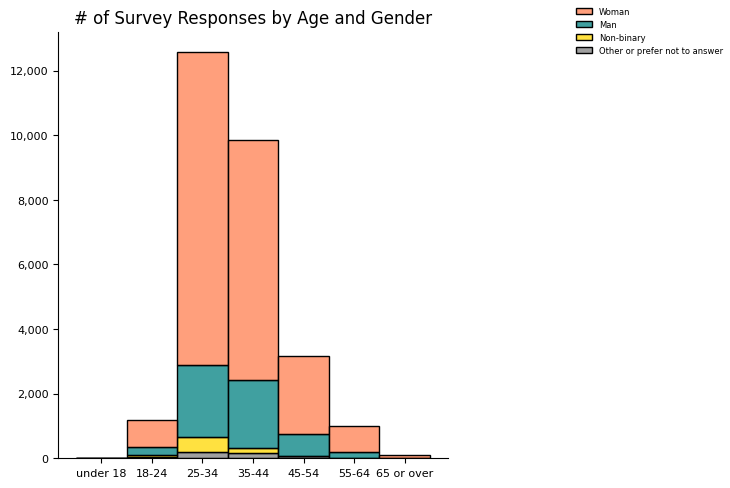

In [89]:
#since we do not have to seperate the genders into different datasets, 
#we want to control the order using gender_order for the paremeter hue_order.
gender_order=['Woman', 'Man', 'Non-binary', 'Other or prefer not to answer']
#color palete for geders
colors=['Coral', 'Teal','Gold','Grey']
#make the plot
plot1=sns.displot(df, x='age', 
            hue='gender', 
            palette=colors,
            hue_order = gender_order,
            multiple='stack', 
            ).set(title='# of Survey Responses by Age and Gender')
#after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
sns.move_legend(plot1, 'upper right', title=None, fontsize=6)
#x & y axis fontsize
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#remove labels from axis 
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Interpreting the Stacked Bar Chart v2

Since this is a replicated chart, our interpretations are the same as with the chart done in matplotlib.  Repeating it here for completeness.  

As with the same chart done in matplotlib, the above shows that more women than any other gender answered the survey in all age categories. 

It also shows that the greatest number of responses came from those 25-34, followed by those 35-44.  

Perhaps this shows who is interested in understanding how their salary compares to their peers:  women, often underpaid, and those in the early decades of their careers.

Younger people are also more likely to choose a gender other than woman or man.

### **Seaborn 2: Histogram Chart**

Again, we look at a histogram of total compansation in the top 2 ccys: USD and CAD. We will limit this to total_comp < 400,000, to focus on the bulk of the responses.

We know way more respondents selected USD (23,250) than CAD 
(1,660), so we use the stat='desity' parameter in sns.histplot to normalize the bin heights.

We will concat the the datafames we made above, df_USD and df_CAD to create the single dataframe used here: df_2ccy.  Recall that we had  multiplied the CAD by the exchange rate as of the survey date: 
1.2816, so our comparison is more appropriate.  

The alpha parameter lets us see how where USD and CAD overlap - the purple area is the overlap.

Properties used are:
1. Colors for each ccy
2. Title
3. Fontsize and placement of the legend      
4. Fontsize of the x and y axis
5. Formatted the x axis to have a , as a seperator for thousands.
6. Removed the labels from the x and y axis (to match the matplotlib charts)

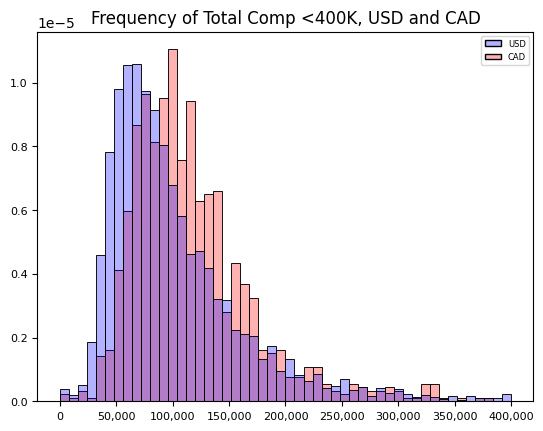

In [90]:
df_2ccy=pd.concat([df_USD,df_CAD])
ccy_clrs=['Blue','Red']
plot2=sns.histplot(data=df_2ccy, 
                   x='total_comp', 
                   hue='all_ccy',
                   palette=ccy_clrs,
                   alpha=0.3,
                   bins=50,
                   binrange=(0, 400000),
                   stat='density',
                   common_norm=False)
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title ('Frequency of Total Comp <400K, USD and CAD')
sns.move_legend(plot2, 'upper right', title=None, fontsize=6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Interpreting the Histogram v2

Since this is a replicated chart, our interpretations are the same as with the chart done in matplotlib.  Repeating it here for completeness. 

The shape of the histogram is roughly the same for USD and CAD: rapidly climbing to beween 50 and 100K, with a longer tail on the right.  The USD (blue) peaks earlier than the CAD (red).  There are more respondents (proportionally, since we normalized by setting density=True) who get paid in CAD at just over 50K and thru about 125K (where the red pops over the purple). On the tail, there are a mix of those paid in USD and those paid in CAD at higher salaries (where the blue or red shows above the purple).  Recall the purple is where the the frequencies of the 2 currencies overlap.  

There is actually and much much longer tail on the right, and depending on what the questions being addressed, that might be interesting to explore.  Here, I chose to focus on the bulk of the data, topping the range at 400K, so we could see more detail within this range.   

# More: A seaborn scatterplot 

Not super interesting, but wanted to try a scatterplot in seaborn.  Here we are looking at the correlation between annual_sal and total_comp. Since total_comp = annual_sal + add_comp, and a good percent of the respondents did not report any add_comp, there is no suprise that we see a strong correlation.  

Again we limited this to annual_sal < 400K, as we did in the histogram.  

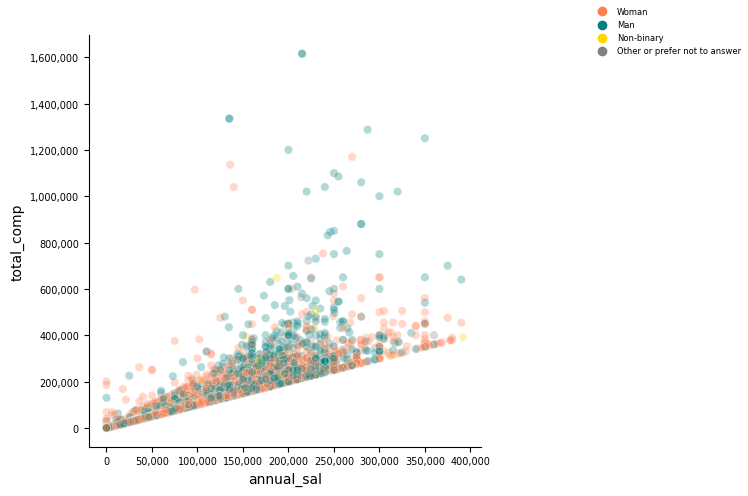

In [91]:
#filering exclude outliers
df3=df[df['annual_sal']< 400000]

splot=sns.relplot(data=df3,
           x='annual_sal',
           y='total_comp',
           kind='scatter',
           hue_order = gender_order,
           hue='gender',
           palette=colors,
           alpha=0.3
           )

current_xvalues = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_xvalues])
current_yvalues = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_yvalues])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
sns.move_legend(splot, 'upper right', title=None, fontsize=6)
#splot.legend(fontsize=6)
plt.show()

# A matplotlib scatterplot

Since I did in seaborn, and the point is to compare, will do in matplotlib too.  

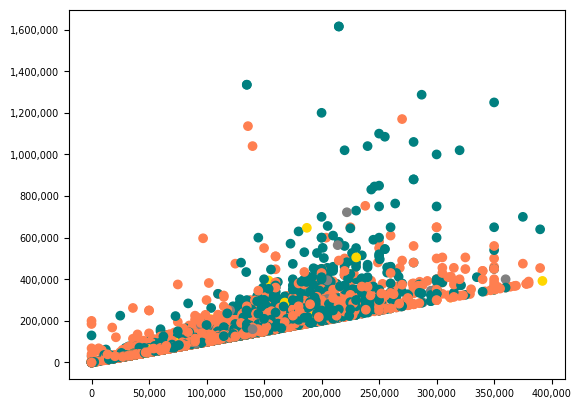

In [92]:
scat_colors={'Woman':'Coral', 'Man':'Teal','Non-binary':'Gold','Other or prefer not to answer':'Grey'}

plt.scatter(df3['annual_sal'], 
            df3['total_comp'], 
            c=df3['gender'].map(scat_colors))
current_xvalues = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_xvalues])
current_yvalues = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_yvalues])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

### **Part 3:**
*In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.*

I am just learning both matplotlib and seaborn, so I can describe my experiance so far, but am open to this evolving as I learn more.  

There was more manipulation of the data needed in matplotlib to create both the stacked bar and the histogram. In both cases, the goal was to plot different facets of the data for comparison.  To do this in matplotlib, subsets of the data for each facet were created.  
       
In seaborn, the data could be used "as is" - and in fact we put the USD and CAD subsets back together (though, to be fair, this is still a subset of all the currencies).  

The formatting of the plots in matplotlib was more straightforward.  And in fact, some of the formating on the seaborn plots was using the underlying matplotlib functions. 

Struggled with getting legends - did not figure out how to do in seaborn until I made the scatterplot, then went back and added it to the others.  And of course, then I could not get a legend for the matplotlib scatterplot!  Perhaps it would work if I slices the data and plotted each with a label.  But not necessary here.  

These seems to be the trade off in using seaborn - making the plot required less data restructuring, but then some of the detailed formatting the resulting plot was more challanging.  

Another minor note: even though the same color names were used in both, the colors rendered differently.  

# Conclusions  

*After exploring your dataset, provide a short summary of what you noticed from this dataset.*

There is a lot more that could be looked at here.  With survey data I typically like to do a quick plot of each question, look for the story, then make more detailed plots to show that story.  Here we just looked at a few things.  But we did see:
- More woman than other genders responded to the survey
- Most respondents were 25 - 44 - perhaps the first half of a career.
- Similarities, and some differences around the 'edges' between USD and CAD total_comp reported.  

The scatterplot was just for fun - if we wanted to dive into that more we might look at only those responses where add_comp was provided, and then see how much add_comp added to total_comp.  

We also dealt here with counts - how many of what age and gender answered.  We might also want to look at those as a percent of total.  

As with much survey data, the structure of the questions could have made the resulting data easier.  I find with surveys it is crucial to begin with the end in mind - know what the resulting data is going to look like and ask questions in a way that will facilitate the analysis.  The column annual_sal should have come in as a number (as add_comp did). Less free text and more categories would also have been helpful.  For example: instead of Job Titles, perhaps a Job Category: Operations, Technology, Professional, Supervisory, Management (or breaking those down into a lower level) would have been more useful.  As it is, there was very little one could do with that field.  Might only add value to illustrate the Job Title of an outlier.    

Survey data like this can be fun and challanging.  And working with less complex data made it easier to focus on the wrangling and visulaizing.  I look forward to using what I have learned in assignments 7 & 8 in the final project, and taking it further to tell a story.  

